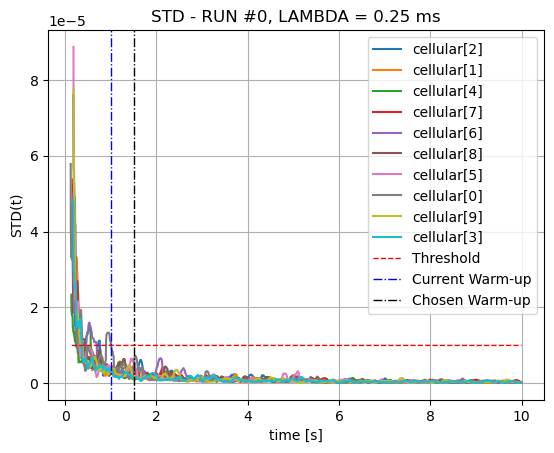

RUN#0 - LAST TIME STD >= 0.00001 = 1.012


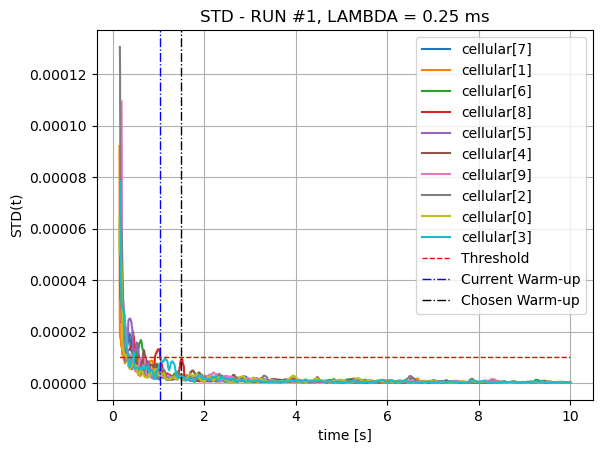

RUN#1 - LAST TIME STD >= 0.00001 = 1.039


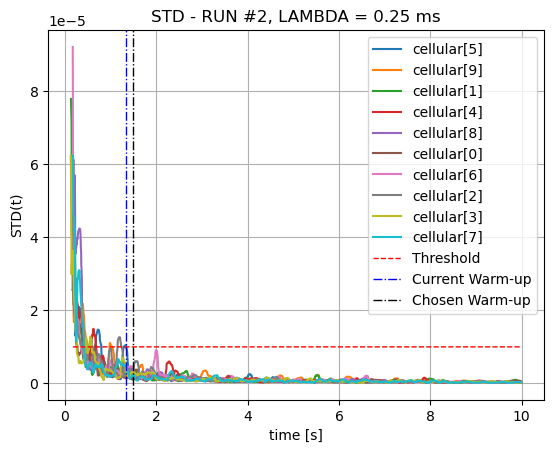

RUN#2 - LAST TIME STD >= 0.00001 = 1.342


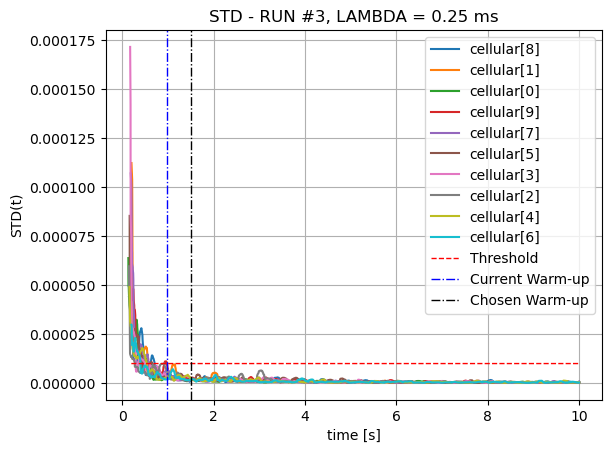

RUN#3 - LAST TIME STD >= 0.00001 = 0.976


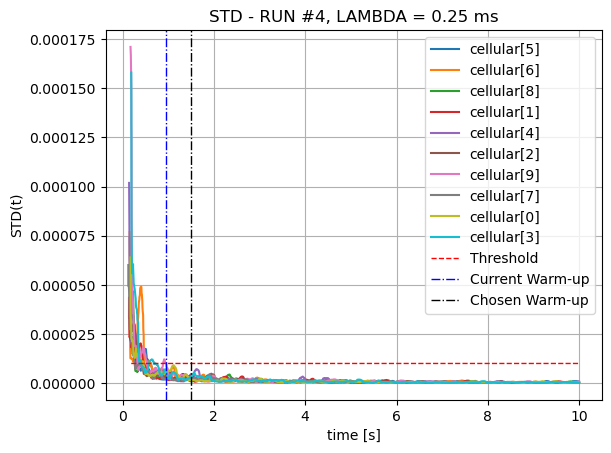

RUN#4 - LAST TIME STD >= 0.00001 = 0.956


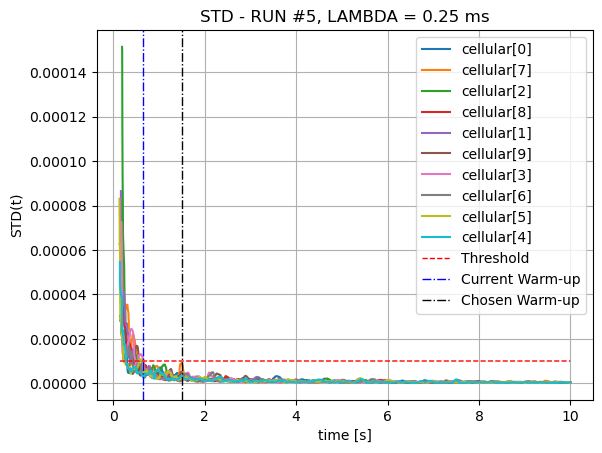

RUN#5 - LAST TIME STD >= 0.00001 = 0.656


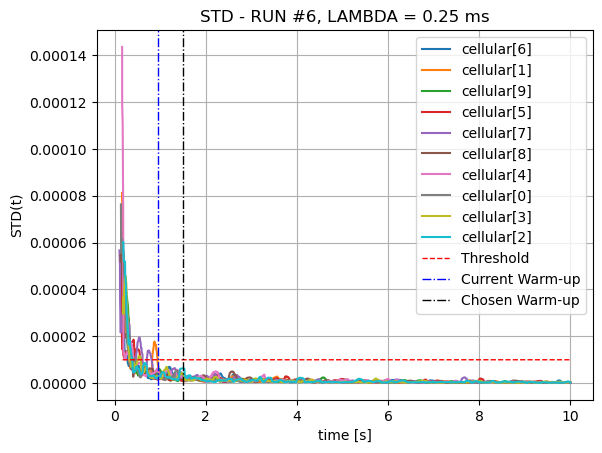

RUN#6 - LAST TIME STD >= 0.00001 = 0.944


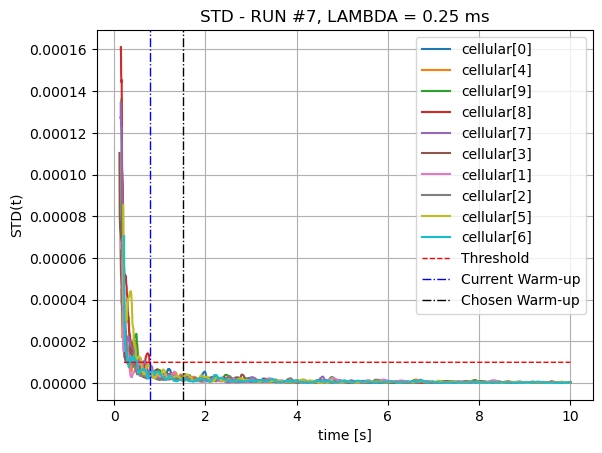

RUN#7 - LAST TIME STD >= 0.00001 = 0.776


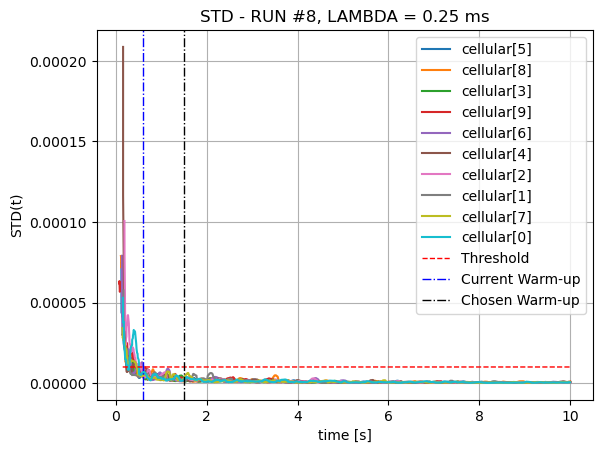

RUN#8 - LAST TIME STD >= 0.00001 = 0.61


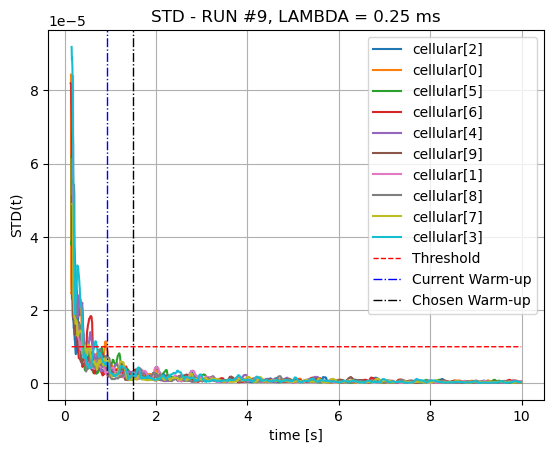

RUN#9 - LAST TIME STD >= 0.00001 = 0.92


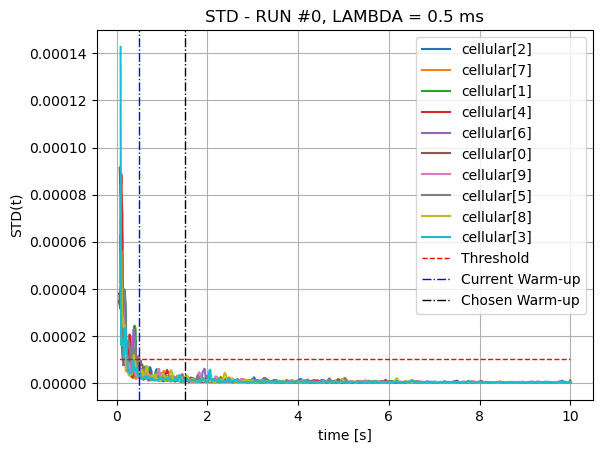

RUN#0 - LAST TIME STD >= 0.00001 = 0.502


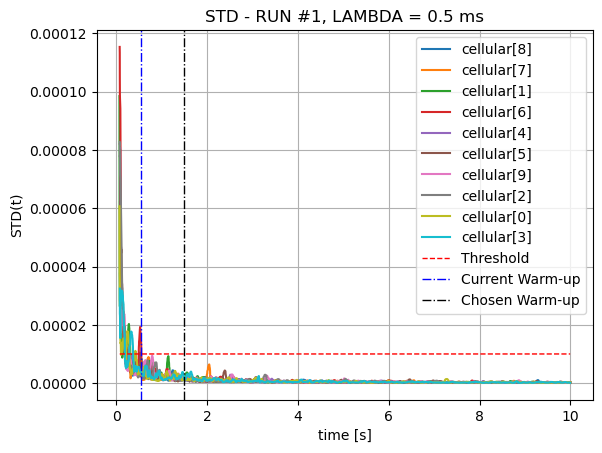

RUN#1 - LAST TIME STD >= 0.00001 = 0.555


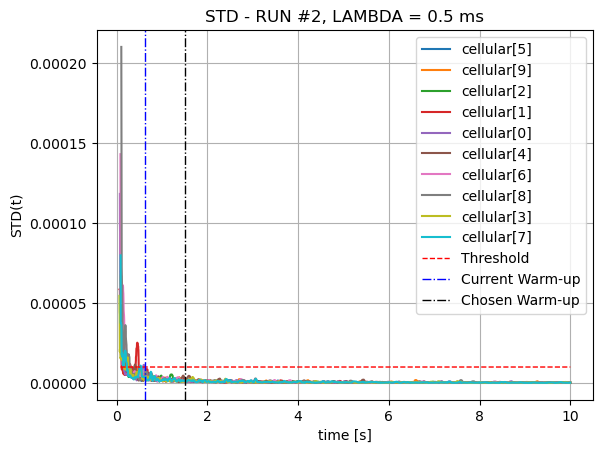

RUN#2 - LAST TIME STD >= 0.00001 = 0.619


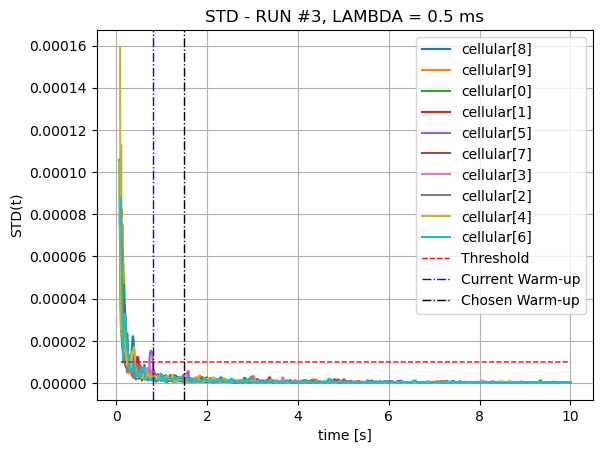

RUN#3 - LAST TIME STD >= 0.00001 = 0.802


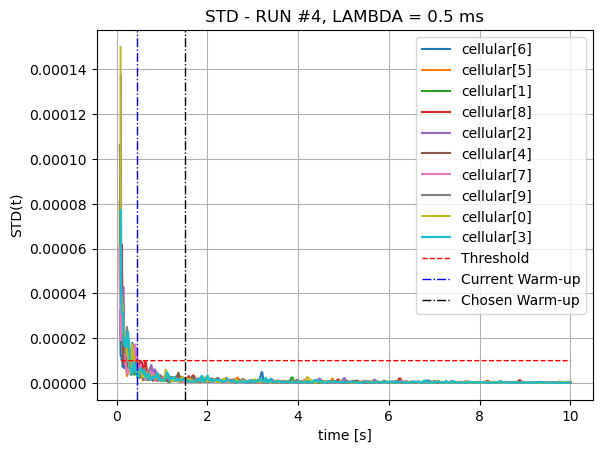

RUN#4 - LAST TIME STD >= 0.00001 = 0.46


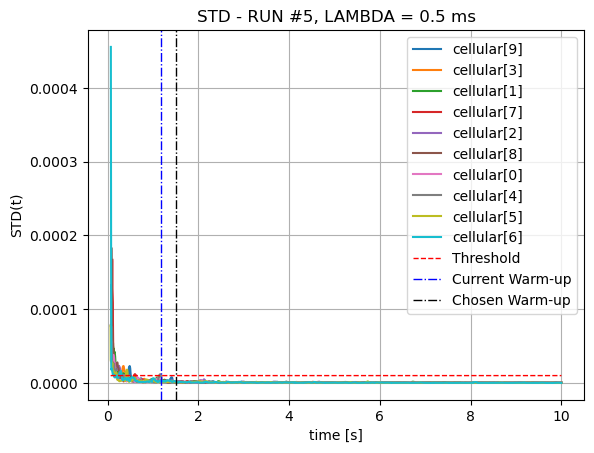

RUN#5 - LAST TIME STD >= 0.00001 = 1.173


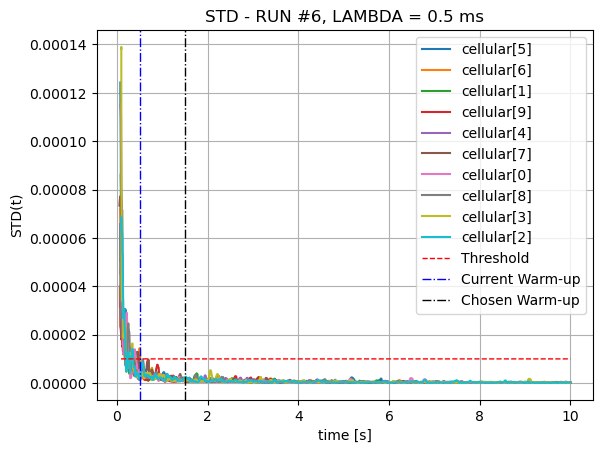

RUN#6 - LAST TIME STD >= 0.00001 = 0.512


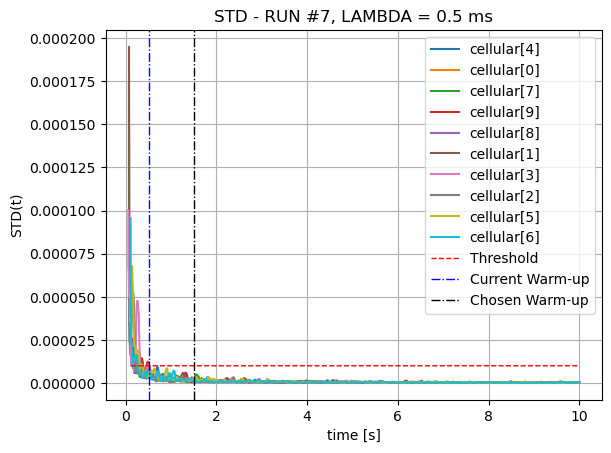

RUN#7 - LAST TIME STD >= 0.00001 = 0.52


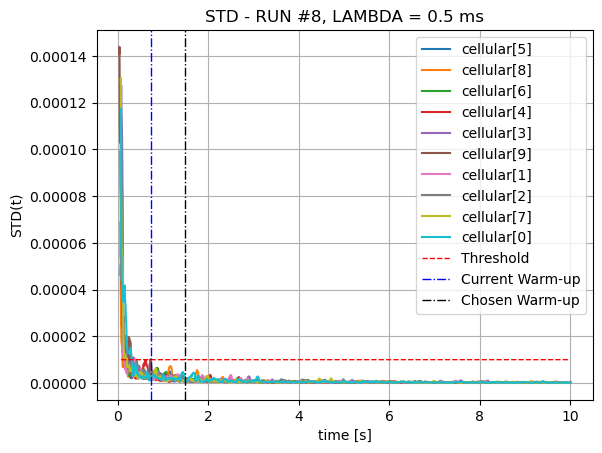

RUN#8 - LAST TIME STD >= 0.00001 = 0.736


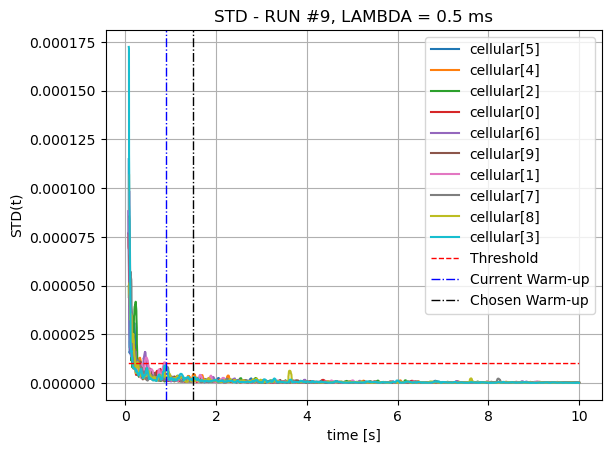

RUN#9 - LAST TIME STD >= 0.00001 = 0.893


In [37]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl 
import scipy.stats as st
import matplotlib.pyplot as plt

path = './'
run = [0,1,2,3,4,5,6,7,8,9]
rate = [25,5]
csv_name = './WarmUp_Estimation/warmuptime#'

def main():

    
        for l in range(0,len(rate)):

            for rep in range(0,len(run)):

                warm_up_i = 0

                # parse csv
                raw = pd.read_csv(path + csv_name + str(run[rep]) + '-lambda0_' + str(rate[l]) + '.csv')

                # compute vector of mean values     
                vec_mean_cell = [[],[],[],[],[],[],[],[],[],[]]

                for j in range(0,10):

                    vec_mean_cell[j] = []

                    times = raw[raw.columns[2*j]]
                    array = raw[raw.columns[2*j+1]]    

                    for i in range(0,len(array)):
                        temp = array[0:i]
                        vec_mean_cell[j].append(np.mean(temp))

                    # plt.plot(times, vec_mean_cell[j], label=raw.columns[2*j]) 
                    #if j == 9:
                    #    plt.title('Mean Response Time as a function of time - RUN #' + run)
                    #    plt.grid(True)
                    #    plt.xlabel('time [s]')
                    #    plt.ylabel('E[R](t) [s]')
                    #    plt.legend()

                    i = 0
                    # Initialize an empty list to store moving std 
                    moving_std = []
                    window_size = 40

                    while i < len(vec_mean_cell[j]) - window_size + 1:
                        window_std = np.std(vec_mean_cell[j][i:i+window_size])
                        moving_std.append(window_std)    
                        if window_std >= 0.00001:
                            if times[i+window_size] > warm_up_i:
                                warm_up_i = times[i+window_size] 
                        i += 1

                    plt.plot(times[window_size-1:], moving_std, label=raw.columns[2*j])

                    if j == 9:
                        plt.title('STD - RUN #' + str(run[rep]) + ', LAMBDA = 0.' + str(rate[l]) + ' ms')
                        plt.grid(True)
                        plt.xlabel('time [s]')
                        plt.ylabel('STD(t)')

                        y = []

                        for x in range(0,len(times[window_size-1:])):
                            y.append(0.00001) 

                        plt.plot(times[window_size-1:], y, linestyle='--', color='red', label='Threshold', lw='1')
                        plt.axvline(x = warm_up_i, linestyle='-.', color = 'b', label='Current Warm-up', lw='1')
                        plt.axvline(x = 1.5, linestyle='-.', color = 'black', label='Chosen Warm-up', lw='1')
                        plt.legend()
                        plt.savefig('./WarmUp_Estimation/run' + str(rep) + '_lambda0' + str(rate[l]) + '.png', bbox_inches='tight')
                        plt.show()
                        print('RUN#' + str(rep) + ' - LAST TIME STD >= 0.00001 = ' + str(warm_up_i))


if __name__ == '__main__':
    main()